# 这是多面体硬颗粒的统计力学模拟程序
### First：载入环境 创建记录数据文件

In [2]:
import hcpmc
data = open('Statistical_data.txt', 'a+')

# 一、制作样品

当然，计算机模拟也是要先制作样品再进行测量计算的。
一个样品的参数通常由粒子数目，粒子位置，粒子形状，粒子朝向，盒子大小，盒子形状等组成。
粒子的所有参数和盒子的所有参数合起来通常也被称为构型（configuration）。

目前可以生成的样品类型：Densest（最密堆积）、SC（简单立方）、FCC（面心立方）、BCC（体心立方）、HCP（密排六方）等。

#### 普通晶格可以很快由下面代码块生成。

In [8]:
import hcpmc
import os
import numpy as np
# TODO: set the factory and the initializer
factory = hcpmc.particlefactory.Family423(a=1,c=3)
temp = 'sample0.gsd'
init = hcpmc.initializer.SC(factory, temp)

# TODO: set the sample packing fraction, particle arangement, and sample name
packing_fraction = 0.56
particle_arangement = [6,6,6]
samplename = 'sample.gsd'

# NO NEED TO CHANGE THIS
init.create_sample0()
init.create_sample(packing_fraction,particle_arangement,samplename)
# os.remove(temp)
data.write('\n\n--------------------------------------------\n')
f = data.write('create_sample: done\n')
f = data.write('packing fraction: '+str(packing_fraction)+'\n')

#### 最密堆积由于需要尝试压缩粒子，需要计算一定时间。并且使用下述不同管道。

##### 步骤1：设定粒子形状以及单胞中粒子个数，运行下面代码

In [2]:
# you may use this code for user-defined shape.
import coxeter
import rowan
import numpy as np
rhombic_dodecahedron = coxeter.families.CatalanFamily.get_shape("Rhombic Dodecahedron")

vertices = rhombic_dodecahedron.vertices

for i in range(len(vertices)):
    vertices[i] = rowan.rotate(
        rowan.from_axis_angle([0, 1, 0], np.arctan(0.56123102 / 0.39685026)),
        vertices[i],
    )

for i in range(len(vertices)):
    if vertices[i][2] < 0:
        vertices[i] = rowan.rotate(rowan.from_axis_angle([0, 0, 1], np.pi / 3), vertices[i])

In [3]:
# Densest using different pipeline
import hcpmc
import numpy as np

# TODO: set the factory and the initializer
factory = hcpmc.particlefactory.Anyshape(vertices)
particle_per_cell = 2
seeds = np.arange(70)
temp = "sample0.gsd"

init = hcpmc.initializer.Densest(factory, particle_per_cell, temp, seeds)

/home/jwang/miniforge3/envs/hd5/lib/python3.13/site-packages/synced_collections/numpy_utils.py:43: NumpyConversionWarning: Any numpy types provided will be transparently converted to the closest base Python equivalents.
  warnings.warn(NUMPY_CONVERSION_WARNING, NumpyConversionWarning)
/home/jwang/miniforge3/envs/hd5/lib/python3.13/site-packages/synced_collections/numpy_utils.py:46: NumpyConversionWarning: Any numpy types provided will be transparently converted to the closest base Python equivalents.
  warnings.warn(NUMPY_CONVERSION_WARNING, NumpyConversionWarning)


##### 步骤2：发送命令开始压缩体系，复制最后两行代码到终端中执行可以查看运行进程。

In [4]:
init.compress()

Output: 
Error: Querying scheduler...
Submitting cluster job 'Densest/461d6be01df036c8e80cdfb1e4f3410d/compress/d1e489ec5a651badb23714932cc7ca94':
 - Group: compress(461d6be01df036c8e80cdfb1e4f3410d)
Submitting cluster job 'Densest/10598cbdfa12d4d36b5a219cf0519529/compress/e5b4950aca94bc560e8fbd0607b7b998':
 - Group: compress(10598cbdfa12d4d36b5a219cf0519529)
Submitting cluster job 'Densest/7e40e632d1d4c3838894d41c804758c3/compress/89e6444033ea912dabf25346fc27141d':
 - Group: compress(7e40e632d1d4c3838894d41c804758c3)
Submitting cluster job 'Densest/50c4dcf295681b73a6d2175f1b946579/compress/8a4265726464805f5eea26e82481861a':
 - Group: compress(50c4dcf295681b73a6d2175f1b946579)
Submitting cluster job 'Densest/7f3ce74af8e40081bf849f0dbfe7a932/compress/a4d5deec7943bba2a64bb3e5d8b56126':
 - Group: compress(7f3ce74af8e40081bf849f0dbfe7a932)
Submitting cluster job 'Densest/bb60d2acede9e27c9dd517cdc76917ae/compress/26ff8ab795a6d032ce2240e34330b149':
 - Group: compress(bb60d2acede9e27c9dd517cd

##### 步骤3：等待全部进程运行结束，指定样品的密度和粒子排布，运行下面的代码生成可用样品。

In [5]:
# TODO: set the sample packing fraction, particle arangement, and sample name
packing_fraction = 0.7
particle_arangement = [4,4,4]
samplename = 'sample.gsd'

# NO NEED TO CHANGE THIS
init.analysis()
init.create_sample0()
init.create_sample(packing_fraction, particle_arangement, samplename)
data.write('\n\n--------------------------------------------\n')
f = data.write('create_sample: done\n')
# os.remove(temp)

get successfully. packing fraction : 0.9999349209000487 


# 二、计算样品的压强值



压强可以直接运行得到

#### （一）流体样品

In [ ]:
import hcpmc
import numpy as np

# TODO: determine the sample and factory
samplename = 'sample.gsd'
factory = hcpmc.particlefactory.Family423(a=1.65,c=2.286)
# TODO: determine the hyperparameters
equilibrium_step = int(1e6)
sampling_step = int(1e4)
seed = 12345

# NO NEED TO CHANGE THIS
pressure = hcpmc.equilibrium.fluid.Pressure(samplename,factory)
pressure.calculate(equilibrium_step,sampling_step,seed)
f = data.write('pressure: '+pressure.get_pressure())

#### （二） 固体样品

In [6]:
import hcpmc
import numpy as np

# TODO: determine the sample and factory
samplename = 'sample.gsd'
# factory = hcpmc.particlefactory.Family423(a=1.65,c=2.286)
# TODO: determine the hyperparameters
equilibrium_step = int(1e2)
sampling_step = int(1e3)
seed = 12345

# NO NEED TO CHANGE THIS
pressure = hcpmc.equilibrium.solid.Pressure(samplename,factory)
pressure.calculate(equilibrium_step,sampling_step,seed)
f = data.write('pressure: '+pressure.get_pressure())


0:00:31  Equilibrating... (5000/1100)  15.653518065834167 19.448716776937506 9.705279013889685 15.47634114685665 7.086635601861554 10.349904559954833 17.109669373737695 7.217604061617761 21.131978440030856 10.267627703297878 21.7703716274805 23.462811837114437 10.100402847912095 7.519180654092155 6.684847022782759 12.564712159206218 4.227223268063659 17.01186118451257 25.6865484700522 5.450036345539707 8.04580328607456 17.639442931972013 22.768939795113695 12.851217216359354 19.516046914616844 17.23501895701399 9.341101127004443 11.706699334072114 13.400617102104604 16.04332369348216 10.553607835851057 11.692213704462086 5.809880281051372 6.368937796419123 28.840951625855112 13.07831793210362 17.828081955382473 30.180807306508726 13.416709380624889 12.617746183079063 17.06496869243622 11.20116292708096 19.002469794277708 8.361878628777568 18.11322701094793 15.465149673983358 3.789010339748189 20.203797896466334 6.639948011082199 8.345098089240793 7.027414444833467 21.414924291804734 5.

52

# 三、使用 Frenkel-Ladd 方法计算固体自由能


##### 步骤1：设定超参数，粒子种类，即简谐势的强度 $k$ 范围

In [18]:
# init.py
import os
import numpy as np
import hcpmc
from flow import FlowProject

# TODO: set the hyperparameters
kmin = 1e-4
kmax = 1e4
n_k = 20
factory = hcpmc.particlefactory.Family423(a=1,c=3)
seeds = [12345]

class FreeEnergy(FlowProject):
    pass


project = FreeEnergy.init_project("FreeEnergy")

# NO NEED TO CHANGE THIS
ks = np.exp(np.linspace(np.log(kmin), np.log(kmax), n_k))
for k in ks:
    for seed in seeds:
        sp = dict(k=k,seed = seed)
        project.open_job(sp).init()             # open a job with the specified statepoint
path = os.getcwd()                          # get the absolute path of the current working directory
f = open(path + '/FreeEnergy/project.py','w')   # open 'project.py' file

/home/jwang/miniforge3/envs/hd5/lib/python3.13/site-packages/synced_collections/numpy_utils.py:46: NumpyConversionWarning: Any numpy types provided will be transparently converted to the closest base Python equivalents.
  warnings.warn(NUMPY_CONVERSION_WARNING, NumpyConversionWarning)


##### 步骤2：设定使用的样品（通常由第一部分得到），并设定粒子的种类（factory），与一些超参数（迭代数目，种子）
##### NOTE!!!!这里不要运行这块代码，反而要导出

In [ ]:
# project.py
# Check this and DON'T RUN this block.
from flow import FlowProject
import sys
sys.path.append('/home/jwang/HOOMD_HPMC')
import hcpmc
import os
path = os.getcwd() + '/..'

# TODO: Determine the sample, factory, steps and seed.
# TODO: Then you copy this block to a file named 'project.py' in 'FreeEnergy' directory.
samplename = path+'/sample.gsd'
factory = hcpmc.particlefactory.Family423(a=1,c=3)
equilibrium_steps = 20000
sampling_steps = 30000

# NO NEED TO CHANGE THIS
class FreeEnergy(FlowProject):
    pass
@FreeEnergy.label
def finish(job):
    return 'dF' in job.document
@FreeEnergy.post(finish)
@FreeEnergy.operation(directives={"memory": "1g","walltime":24})
def sample(job):
    with job:
        H = hcpmc.equilibrium.solid.Harmonic(samplename,factory,job.sp.k)
        H.calculate(equilibrium_steps,sampling_steps,job.sp.seed)
        job.doc['dF'] = H.dF
if __name__ == '__main__':
    FreeEnergy().main()

运行下述代码，提交计算自由能的程序，复制输出的最后两行代码到终端可以查看运行进度

In [19]:
# NO NEED TO CHANGE THIS
%cd FreeEnergy
!python project.py submit -o sample
%cd ..
path = os.getcwd() + '/FreeEnergy'
print('cd '+path)
print('watch -n 1 python project.py status')


/home/jwang/HOOMD_HPMC/test/FreeEnergy
Querying scheduler...
Submitting cluster job 'FreeEnergy/c6296d595ff9652e8cebbece1c751d99/sample/dfabdcff31ee33133e4dadabcbf783ef':
 - Group: sample(c6296d595ff9652e8cebbece1c751d99)
Submitting cluster job 'FreeEnergy/6a6b19aa24e72e4b2d8c0e08bd105f76/sample/1e14f6df2c3e8ad11b6ee45255137796':
 - Group: sample(6a6b19aa24e72e4b2d8c0e08bd105f76)
Submitting cluster job 'FreeEnergy/230c7501ca98e501ce78756d41aaf2c6/sample/4c7a3bfaa9e940db85c216ef674c2180':
 - Group: sample(230c7501ca98e501ce78756d41aaf2c6)
Submitting cluster job 'FreeEnergy/3a5321281acff1bc80c2f400d1645574/sample/d25dafb204fef62e39a03163dacd38a9':
 - Group: sample(3a5321281acff1bc80c2f400d1645574)
Submitting cluster job 'FreeEnergy/7713c486ecfff5e8ff6b1311090a81f6/sample/edadf9be4dafb8144f77d71426e68770':
 - Group: sample(7713c486ecfff5e8ff6b1311090a81f6)
Submitting cluster job 'FreeEnergy/b012e97ec4f11abf58ccca15a20daa4f/sample/cd040e39044bca3a3d7c45eb60a5d970':
 - Group: sample(b012e97

##### 步骤3：分析得到的数据，通过公式得到体系的自由能

[Errno 2] No such file or directory: 'FreeEnergy'
/home/jwang/HOOMD_HPMC/test/FreeEnergy
rm: cannot remove 'slurm*': No such file or directory
7.052434713728023 +/- 0.0


/tmp/ipykernel_217073/1648983060.py:24: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(energy_temp,np.log(ks))


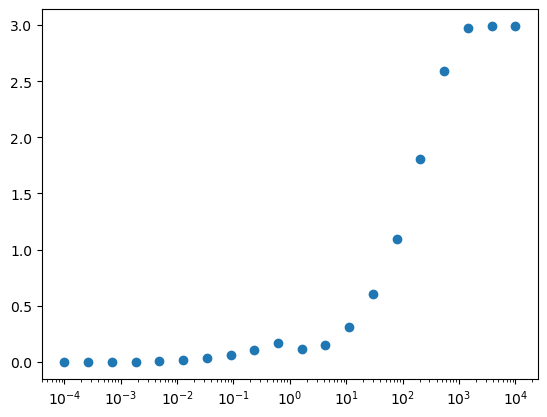

In [22]:
%cd FreeEnergy
!rm slurm*
import signac
import gsd.hoomd
import matplotlib.pyplot as plt
samplename = '../sample.gsd'
Nsym = len(factory.get_symmetries())
with gsd.hoomd.open(samplename, 'r') as f:
    N = f[0].particles.N
    box = f[0].configuration.box
    V = box[0] * box[1] * box[2]
    rho = N/V
project = signac.get_project('.')
free_energy = []
for seed in seeds: 
    energy_temp = dict()
    for job in project:
        if job.sp.seed == seed:
            energy_temp[job.sp.k] = job.document['dF']
    ks = np.array(sorted(energy_temp.keys()))
    energy_temp = np.array([energy_temp[k] for k in ks])
    plt.plot(ks,energy_temp,'o')
    plt.xscale('log')
    integral = np.trapz(energy_temp,np.log(ks))
    F_Ein = -3/2*(N-1)/N*np.log(np.pi/(ks[-1]/2))-3/2*np.log(np.pi/(ks[-1]/2))+np.log(2*np.pi**2)-np.log(Nsym)
    dF_CM = (-np.log(rho)+3/2*np.log(N))/N
    F_ig = np.log(rho)-1
    free_energy.append(F_Ein - integral - dF_CM)
free_energy = np.array(free_energy)
print(free_energy.mean(),'+/-',free_energy.std()/np.sqrt(len(free_energy)))

# 四、使用Widom Insertion方法计算流体化学势
可以直接运行，推荐样品的堆积分数在0.1以下。

In [ ]:
import hcpmc
# TODO: Determine the sample, factory, steps and seed.
samplename = 'sample.gsd'
factory = hcpmc.particlefactory.Anyshape(vertices)
sampling_step = 1e4
trials = 1e5
seed = 12345

# NO NEED TO CHANGE THIS
che_pot = hcpmc.equilibrium.fluid.ChemicalPotential(samplename,factory)
che_pot.calculate(sampling_step, trials, seed)
f = data.write('chemical potential: '+che_pot.get_chemical_potential())

# 五、使用Umbrella Sampling方法计算非平衡态的自由能


使用方法类似固体自由能计算，需额外指定序参量

##### 步骤1：设定超参数，粒子种类，取样窗口，序参量

In [4]:
# init.py
import os
import numpy as np
from flow import FlowProject

import hcpmc.OrderParameter

# TODO: set the hyperparameters
n_window = 30
ks = [8e6] * n_window
windows = np.linspace(1.5, 1.95, n_window)
seeds = [12345]



class Umbrella(FlowProject):
    pass


project = Umbrella.init_project("UmbrellaSampling")

# NO NEED TO CHANGE THIS
for k, window in zip(ks, windows):
    for seed in seeds:
        sp = dict(k=k, window=window, seed=seed)
        project.open_job(sp).init()  # open a job with the specified statepoint
path = os.getcwd()  # get the absolute path of the current working directory
f = open(path + "/UmbrellaSampling/project.py", "w")  # open 'project.py' file

/home/jwang/miniforge3/envs/hd5/lib/python3.13/site-packages/synced_collections/numpy_utils.py:46: NumpyConversionWarning: Any numpy types provided will be transparently converted to the closest base Python equivalents.
  warnings.warn(NUMPY_CONVERSION_WARNING, NumpyConversionWarning)


##### 步骤2：设定使用的样品，并设定粒子的种类，与一些超参数（采样数目）
##### NOTE!!!!这里不要运行这块代码，反而要导出

In [ ]:
# project.py
# Check this and DON'T RUN this block.
from flow import FlowProject
import sys
sys.path.append('/home/jwang/HOOMD_HPMC')
import hcpmc
import os
path = os.getcwd() + '/..'

# TODO: Determine the sample, factory, orderparameter, steps and seed.
# TODO: Then you copy this block to a file named 'project.py' in 'UmbrellaSampling' directory.
samplename = path+'/sample.gsd'
factory = hcpmc.particlefactory.Family423(a=1.65, c=2.286)
orderparameter = hcpmc.OrderParameter.OrderParameterAveQlNear(4, 1.8, 12)
sampling_steps = 50000

# TODO: Determine the hyperparameter. Don't set too small.
# NOTE: Bigger simtrials bring more time cost and success rate.
# NOTE: Bigger equili_strict bring more time cost and less fault.
simtrials = 50
equili_strict = 20

# NO NEED TO CHANGE THIS
class Umbrella(FlowProject):
    pass
@Umbrella.label
def finish(job):
    return 'done' in job.document
@Umbrella.post(finish)
@Umbrella.operation(directives={"memory": "1g","walltime":100})
def sample(job):
    with job:
        H = hcpmc.umbrella.UmbrellaSampling.BiasSampling(samplename,factory,job.sp.k,job.sp.window,sampling_steps)
        H.calculate(orderparameter,simtrials,equili_strict,job.sp.seed)
        job.doc['done'] = 1
if __name__ == '__main__':
    Umbrella().main()

运行下述代码，提交UmbrellaSampling的程序，复制输出的最后两行代码到终端可以查看运行进度

In [ ]:
# NO NEED TO CHANGE THIS
%cd UmbrellaSampling
!python project.py submit -o sample
%cd ..
path = os.getcwd() + '/UmbrellaSampling'
print('cd '+path)
print('watch -n 1 python project.py status')

##### 步骤3：运行代码块。复制输出到终端运行，将得到的数据进行wham分析，得到自由能变化。

In [ ]:
# NO NEED TO CHANGE THIS
import signac
project = signac.get_project('UmbrellaSampling')
timeseries_paths = []
windows = []
ks = []
for job in project:
    timeseries_paths.append(job.path+f'/window_{job.sp.window:.3f}')
    windows.append(job.sp.window)
    ks.append(job.sp.k)
with open('UmbrellaSampling/metadata.txt', 'w') as f:
    f.write('# timeseries list for wham\n')
    for path,window,k in zip(timeseries_paths,windows,ks):
        f.write(path+' '+str(window)+' '+str(k)+'\n')

# TODO: set the umberella sampling hist range, tolerance, temperature, outfilename
hist_left = min(windows) - (max(windows)-min(windows))/10
hist_right = max(windows) + (max(windows)-min(windows))/10
num_hist = 100
tolerance = 1e-5
temperature = 1
outfilename = 'pmf.out'

# NO NEED TO CHANGE THIS
print(f'wham {hist_left} {hist_right} {num_hist} {tolerance} {temperature} 0 metadata.txt {outfilename}')

##### 步骤4：运行代码块。将WHAM结果的自由能可视化。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("pmf.out", comments="#")  # 跳过以 # 开头的注释行
x = data[:, 0]  # 反应坐标（单位：Å）
free_energy = data[:, 1]  # 自由能（单位：kcal/mol）
plt.figure(figsize=(8, 5), dpi=150)  # 设置图像大小和分辨率

plt.plot(
    x,
    free_energy,
    color="royalblue",
    linewidth=2,
    marker="o",
    markersize=5,
    label="PMF",
)

if data.shape[1] >= 3:
    error = data[:, 2]  # 第2列是自由能误差
    plt.fill_between(
        x,
        free_energy - error,
        free_energy + error,
        alpha=0.3,
        color="skyblue",
        label="Error",
    )

# 设置坐标轴
plt.xlabel("Reaction Coordinate", fontsize=12)
plt.ylabel(r"$F/(Nk_BT)$", fontsize=12)
plt.title("Free Energy", fontsize=14)

plt.xlim(x.min() - 0.5, x.max() + 0.5)
plt.ylim(
    np.floor(free_energy.min() - 1),
    np.ceil(free_energy.max() + 1),
)

# 添加辅助元素
plt.grid(alpha=0.3, linestyle="--")  # 半透明虚线网格
plt.legend(frameon=False)  # 无边框图例
plt.show()
# # 保存图像（支持PDF/PNG/SVG等格式）
# plt.savefig("pmf_plot.png", bbox_inches="tight", dpi=300)